In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

%load_ext tensorboard

_include_('curriculum_vqa')
_include_('commons')

data_bin = f'{DEV_HOME}/curriculum_vqa/data-bin'

In [3]:
from cvqa import datasets, models, trainers, viz

In [38]:
curriculum_root = f'{data_bin}/basic_curriculum'
# curriculum_root = f'{data_bin}/curriculum_1'

train_dataset = datasets.Curriculum(curriculum_root, 'train', limit=100)
vocab = train_dataset.vocab
dev_dataset = train_dataset # datasets.Curriculum(curriculum_root, 'dev', vocab=vocab, limit=10)
train_dataset

Root: /Users/urisherman/Work/workspace/curriculum_vqa/data-bin/basic_curriculum/train 
Samples: 100 (N_prompt=8, N_target=1)
Concepts: 0 
Classes: 0 
Vocab Tokens:19

In [39]:
train_dataset.use_viz_rep = True

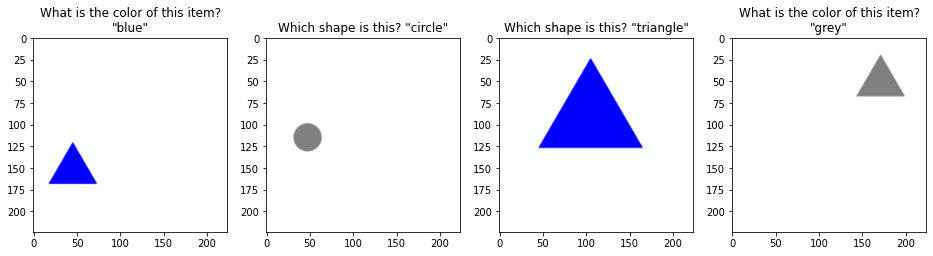

In [40]:
viz.show_samples(train_dataset)

In [41]:
import numpy as np
import torch
import torch.nn as nn
import torchvision as tv
from cvqa import fairseq_misc

# nn.Conv2d(5, 2, kernel_size=1, padding=0, bias=False).weight

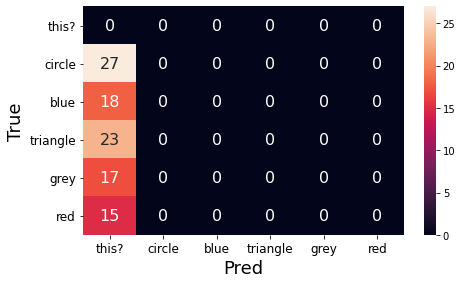

In [42]:
import numpy as np
import torch
import torch.nn as nn
import torchvision as tv
from cvqa import fairseq_misc

seed = 1
np.random.seed(seed)
torch.manual_seed(seed)


model = models.VQAModelV1.struct_img_build(train_dataset, d=16, img_output_features=3)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

trainer = trainers.VQATrainer(log_dir='runs/basic')
trainer.use_img_structure = True

y_true, y_pred = trainer.get_predictions(model, train_dataset)
viz.one_word_conf_mat(y_true, y_pred, train_dataset.vocab)

In [44]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


train_loss, train_acc, dev_acc = trainer.train(
    model, train_dataset, dev_dataset, 
    optimizer, num_epochs=200, batch_size=32
)

[epoch=199, train_acc=1.00, dev_acc=1.00] loss: 0.042: 100%|██████████| 200/200 [00:18<00:00, 10.81it/s]


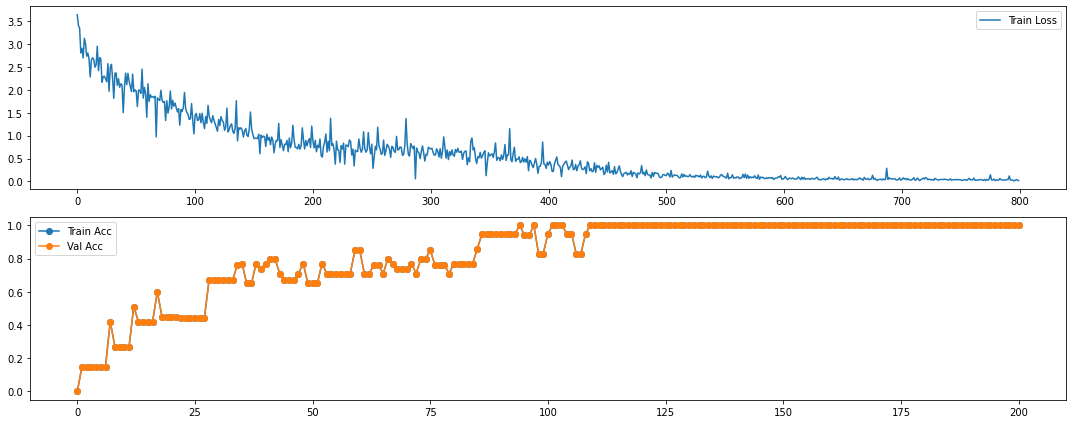

In [45]:
viz.plot_training(train_loss, train_acc, dev_acc)

Sample index: 71
Prompt: What is the color of this item?
Decoded encoded prompt: What is the color of this item?
True: blue
Pred: blue
* Encoded Structured Img Rep: tensor([4, 5])


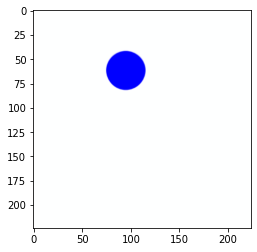

In [63]:
viz.test_natural_sample(model, train_dataset)

In [64]:
y_true, y_pred = trainer.get_predictions(model, train_dataset)

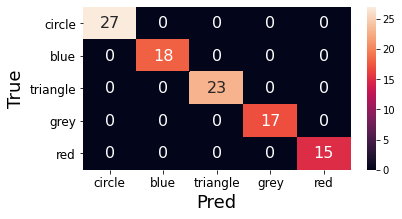

In [65]:
viz.one_word_conf_mat(y_true, y_pred, train_dataset.vocab)